In [8]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='Date'>

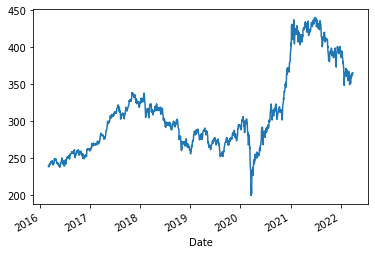

In [18]:
# 원달러환율(USD/KRW)
df = fdr.DataReader('KS200', "2016/3/1", "2022/3/31")
df['Close'].plot()

In [19]:
# data type 확인후 불필요한 목록 삭제
df.info()

drop_columns = ['Open', 'High', 'Low', 'Volume', 'Change']
df.drop(drop_columns, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1496 entries, 2016-03-02 to 2022-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1496 non-null   float64
 1   Open    1496 non-null   float64
 2   High    1496 non-null   float64
 3   Low     1496 non-null   float64
 4   Volume  1496 non-null   float64
 5   Change  1496 non-null   float64
dtypes: float64(6)
memory usage: 81.8 KB


In [20]:
# 컬럼명 변경
df = df.rename(columns={'Close':'KS200'})

In [21]:
# 인덱스를 컬럼으로
df['Date'] = df.index

In [22]:
df = df[['Date', "KS200"]]
df


,Date,KS200
Date,,
2016-03-02,2016-03-02,238.63
2016-03-03,2016-03-03,240.09
2016-03-04,2016-03-04,239.74
2016-03-07,2016-03-07,240.21
2016-03-08,2016-03-08,238.44
...,...,...
2022-03-25,2022-03-25,362.06
2022-03-28,2022-03-28,362.06
2022-03-29,2022-03-29,363.77


In [23]:
# 시각화 확인
fig = px.line(df, x='Date', y=['KS200'])
fig.show()

In [24]:
df.to_csv('./csv/KS200.csv', index=None)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2016-03-01 to 2022-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1534 non-null   datetime64[ns]
 1   REMX    1534 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.0 KB


In [17]:
# KOPSI
df = fdr.DataReader('AAPL', "2016/3/1", "2020/3/31")
df

# # 컬럼명 변경
# df = df.rename(columns={'Close':'KOSPI_200'})

# # 인덱스를 컬럼으로
# df['Date'] = df.index

# fig = px.line(df, x='Date', y="KOSPI_200")
# fig.show()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-03-01,25.13,24.41,25.19,24.36,201630000.0,0.0397
2016-03-02,25.19,25.13,25.22,24.91,132680000.0,0.0024
2016-03-03,25.38,25.14,25.43,25.11,147820000.0,0.0075
2016-03-04,25.75,25.59,25.94,25.34,184220000.0,0.0146
2016-03-07,25.47,25.60,25.71,25.24,143660000.0,-0.0109
...,...,...,...,...,...,...
2020-03-25,61.38,62.69,64.56,61.08,303600000.0,-0.0055
2020-03-26,64.61,61.63,64.67,61.59,252560000.0,0.0526
2020-03-27,61.94,63.19,63.97,61.76,204220000.0,-0.0414
